# Projective Geometry
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-09

## Table of Contents
* Points and Lines in the Homogeneous Coordinate
* Review of Linear Algebra
* Null Vector
* Singular Value Decomposition (Application)
* Euclidean Transformation
* Similrity Transformation
* Anisotropic Scaling
* Affine Transformation
* Point Correspondance for Estimating a Homography

# Points and Lines in the Homogeneous Coordinate

Q1: Intersection point ($p_x$,$p_y$) of the two lines $l_1$ and $l_2$   

$l_1$ passes trhough two distinct points, (0,1) and (1,2).   

$l_2$ passes trhough two distinct points, (4,0) and (5,3).   

**Method 1 (using the homogeneous coordinate representaion)**

In [1]:
import numpy as np

# Lines are defined by two points each. 
# Using cross product to get the lines in homogeneous form.
l1 = np.cross([0,1,1], [1,2,1])
l2 = np.cross([4,0,1], [5,3,1])

# Intersection of the two lines is the cross product of the two lines.
x = np.cross(l1, l2)

# Convert from homogeneous to cartesian coordinates.
px = x[0] / x[2]
py = x[1] / x[2]

print(f"(px,py) = ({px:.2f}, {py:.2f})")


(px,py) = (6.50, 7.50)


**Method 2 (Line-line intersection)**  
https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection  

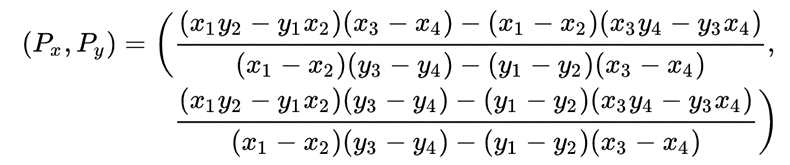

(px,py) = (6.50, 7.50)


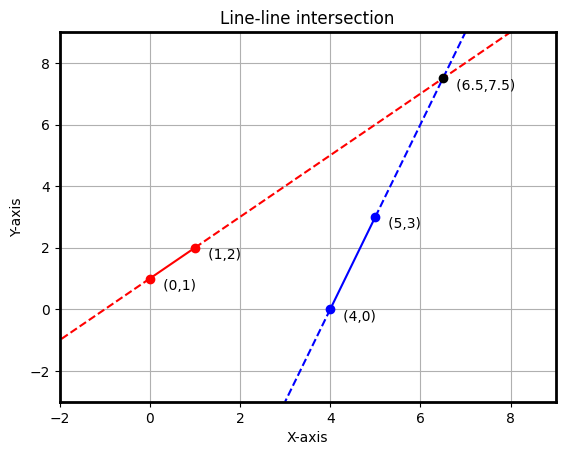

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating denominators and numerators for the intersection point
denom = (0-1)*(0-3) - (1-2)*(4-5)
numerx = (0*2-1*1)*(4-5) - (0-1)*(4*3-0*3)
numery = (0*2-1*1)*(0-3) - (1-2)*(4*3-0*3)

# Calculating the intersection points
px = numerx/denom
py = numery/denom

print(f"(px,py) = ({px:.2f}, {py:.2f})")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot points and lines for red
ax.plot([0, 1], [1, 2], 'or', linewidth=3)
ax.plot([0, 1], [1, 2], '-r', linewidth=1.5)

# Plot points and lines for blue
ax.plot([4, 5], [0, 3], 'ob', linewidth=3)
ax.plot([4, 5], [0, 3], '-b', linewidth=1.5)

# Plot dashed extension lines for red and blue
ax.plot([1, 8], [2, 9], '--r', linewidth=1.5)
ax.plot([5, 7], [3, 9], '--b', linewidth=1.5)
ax.plot([0, -2], [1, -1], '--r', linewidth=1.5)
ax.plot([4, 3], [0, -3], '--b', linewidth=1.5)

# Plot black point
ax.plot(6.5, 7.5, 'ok', linewidth=3)

# Add text
points = [(0,1), (1,2), (4,0), (5,3), (6.5,7.5)]
for px, py in points:
    ax.text(px, py, f'   ({px},{py})', verticalalignment='top')

# Set axis properties
ax.grid(True)
ax.set_title('Line-line intersection')
ax.set_xlabel('X-axis')
ax.set_xlim([-2, 9])
ax.set_ylabel('Y-axis')
ax.set_ylim([-3, 9])
ax.tick_params(axis='both', which='major', labelsize=10)
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.show()



# Review of Linear Algebra

Reference: Howard Anton & Rober C. Busby (2002) "Contemporary Linear Algebra"

* A nonempty set of vectors in $R^n$ is called a subspace of $R^n$ if it is closed under scalar multiplication and addition. 
* If all vectors in $v_1, v_2, ..., v_3$ are vectors in $R^n$, then the set of all linear combinations $x = t_1v_1 + t_2v_2 + \dots + t_sv_s$ is a subspace of $R^n$. 
* The subspace of $W$ of $R^n$ whose vectors satify this linear combination is called the **span** of $v_1, v_2, ..., v_3$ and is denoted by $W = \text{span}\{v_1, v_2, \dots, v_s\}$
* The row space of A, denoted by $\text{row}(A)$, is the subspace of $R^n$ that is spanned by the row vectors of A. 
* The column space of A, denoted by $\text{col}(A)$, is the subspace of $R^n$ that is spanned by the col vectors of A. 
* The null space of A, denoted by $\text{null}(A)$, is the solution space of $Ax=0$. This is a subspace of $R^n$.
* The dimension of the row space of a matrix A is called the rank of A and is denoted by $\text{rank}(A)$; and the dimension of the null space of A is called the nullity of A and is denoted by $\text{nullity}(A)$. 
* If $S$ is a nonempty set in $R^n$, then the orthogonal complement of $S$, denoted by $(S)^\perp$, is defined to be the set of all vectors in $R^n$ that are orthogonal to every vector in $S$. 
* If  is a nonempty set in $R^n$, then $S^\perp$ is a subspace of $R^n$. 
* If A is an m x n matrix, then the row space of A and the null space of A are orthogonal complements ($\text{row}(A)^\perp = \text{null}(A)$)
* If A is an m x n matrix, then $\text{rank}(A) + \text{nullity}(A) = n$

# Null Vector

In [35]:
import numpy as np
from scipy.linalg import svd
from sympy import Matrix, init_printing

# https://stackoverflow.com/questions/19820921/a-simple-matlab-like-way-of-finding-the-null-space-of-a-small-matrix-in-numpy
def null(a, rtol=1e-5):
    u, s, v = np.linalg.svd(a)
    rank = (s > rtol*s[0]).sum()
    return rank, v[rank:].T.copy()

# Example 1
print("Example 1")

A1 = np.array([[1, 1, 1], [2, 3, 1], [3, 2, 3]])
b1 = np.array([6, 9, 16])

x1 = np.linalg.inv(A1).dot(b1)
print("Unique solution:", x1)

rank_A1, null_vec_A1 = null(A1)
print("Rank of A1:", rank_A1)
print("Null space of A1:", null_vec_A1)

nullity_A1 = len(A1[0]) - rank_A1
print("Nullity of A1:", nullity_A1)

U, S, Vt = svd(A1)
print("U:"); display(Matrix(U))

A1_shape = A1.shape
Smat = np.zeros(A1_shape)
Smat[:min(A1_shape), :min(A1_shape)] = np.diag(S)

print("S:"); display(Matrix(Smat))
print("U * S * Vt:"); display(Matrix(U.dot(Smat).dot(Vt)))
print("A1"); display(Matrix(A1))


# Example 2
print("\nExample 2")

A2 = np.array([[1, 1, 1, -6], [2, 3, 1, -9], [3, 2, 3, -16]])

rank_A2, null_vec_A2 = null(A2)

print("Rank of A2:", rank_A2)
print("Null space of A2:"); display(Matrix(null_vec_A2))

nullity_A2 = len(A2[0]) - rank_A2
print("Nullity of A2:", nullity_A2)

U, S, Vt = svd(A2)
print("U:"); display(Matrix(U))

A2_shape = A2.shape
Smat = np.zeros(A2_shape)
Smat[:min(A2_shape), :min(A2_shape)] = np.diag(S)

print("S:"); display(Matrix(Smat))
print("Vt:"); display(Matrix(Vt))
print("U * S * Vt:"); display(Matrix(U.dot(Smat).dot(Vt)))
print("A2"); display(Matrix(A2))

print("A2 * null(A2):"); display(Matrix(A2.dot(null_vec_A2)))
print("A2 * last column of Vt:"); display(Matrix(A2.dot(Vt[-1])))


Example 1
Unique solution: [-1.  2.  5.]
Rank of A1: 3
Null space of A1: []
Nullity of A1: 0
U:


Matrix([
[-0.285956900108872, 0.0428765716561448, -0.957282743437455],
[ -0.58302302282851, -0.800598002874316,  0.138300371096983],
[-0.760468806810662,  0.597665824183274,  0.253934551550782]])

S:


Matrix([
[6.04219799461642,                0,                 0],
[               0, 1.57505623738392,                 0],
[               0,                0, 0.105077318824155]])

U * S * Vt:


Matrix([
[0.999999999999999, 1.0, 1.0],
[              2.0, 3.0, 1.0],
[              3.0, 2.0, 3.0]])

A1


Matrix([
[1, 1, 1],
[2, 3, 1],
[3, 2, 3]])


Example 2
Rank of A2: 3
Null space of A2:


Matrix([
[ 0.179605302026773],
[-0.359210604053549],
[-0.898026510133875],
[-0.179605302026775]])

Nullity of A2: 1
U:


Matrix([
[ 0.30872083055977, 0.0367434687733005, -0.950442721199437],
[0.476075906229903, -0.871045031740676,   0.12096397888323],
[0.823433774074068,  0.489826979843282,  0.286402425848222]])

S:


Matrix([
[20.2217429943856,                0,                 0, 0],
[               0, 1.74822936933164,                 0, 0],
[               0,                0, 0.157493940272731, 0]])

Vt:


Matrix([
[  0.18451297528001,   0.167335530786693,  0.160970202218257, -0.955009097384663],
[-0.134916881798169,  -0.913345636890089,  0.363327254252288, -0.124861879279429],
[ 0.956814680302852, -0.0936285728058365,  0.188759867058866,  0.200272490620186],
[ 0.179605302026773,  -0.359210604053549, -0.898026510133875, -0.179605302026775]])

U * S * Vt:


Matrix([
[1.0, 1.0, 1.0,  -6.0],
[2.0, 3.0, 1.0,  -9.0],
[3.0, 2.0, 3.0, -16.0]])

A2


Matrix([
[1, 1, 1,  -6],
[2, 3, 1,  -9],
[3, 2, 3, -16]])

A2 * null(A2):


Matrix([
[3.33066907387547e-16],
[2.22044604925031e-16],
[                   0]])

A2 * last column of Vt:


Matrix([
[3.33066907387547e-16],
[2.22044604925031e-16],
[                   0]])

# Singular Value Decomposition (Application)

The size of the image is (512, 512)


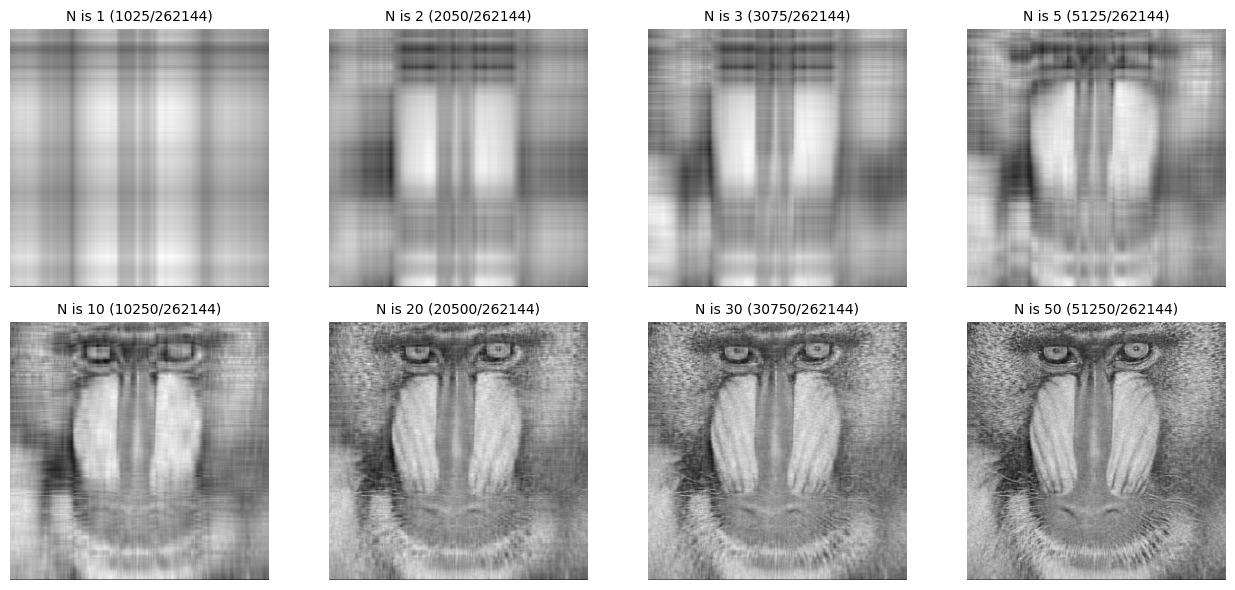

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
filenameImgG = '4.2.03.tiff'
imgG = mpimg.imread(filenameImgG)
imgGD = np.dot(imgG[...,:3], [0.2989, 0.5870, 0.1140]) # Convert RGB to grayscale

# Print the size of the image
print('The size of the image is', imgGD.shape)

# Apply SVD on the original matrix
U, S, Vt = np.linalg.svd(imgGD, full_matrices=False)

# Plot compressed images using varying number of singular values
num_pixel = imgGD.size
plt.figure(1, figsize=(13, 6))
for i, N in enumerate([1, 2, 3, 5, 10, 20, 30, 50]):
    compressed_img = np.dot(U[:, :N], np.dot(np.diag(S[:N]), Vt[:N, :]))

    num_val = U[:,:N].size + S[:N].size + Vt[:N, :].size 

    plt.subplot(2, 4, i+1)
    plt.imshow(compressed_img, cmap='gray')
    plt.title(f'N is {N} (%d/%d)' % (num_val, num_pixel), fontsize=10) 
    plt.axis('off')

plt.tight_layout()
plt.show()


# Euclidean Transformation

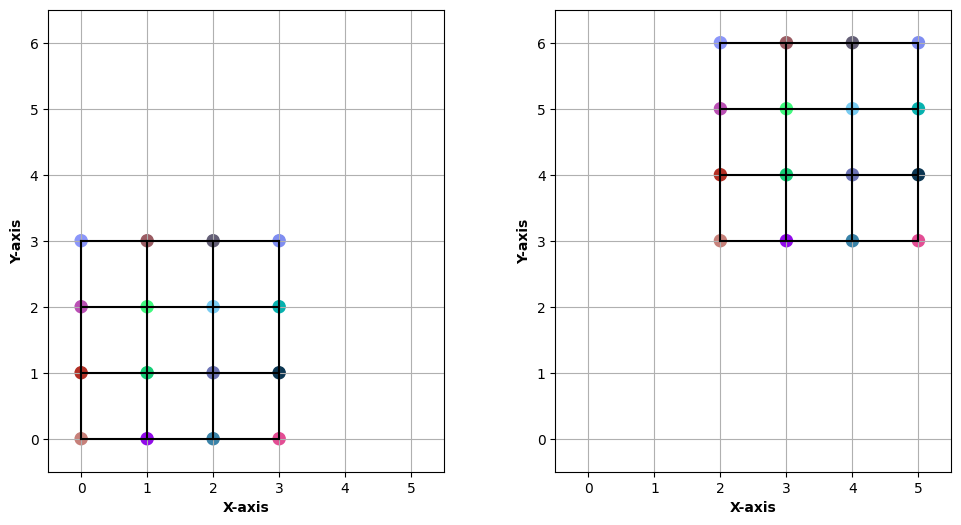

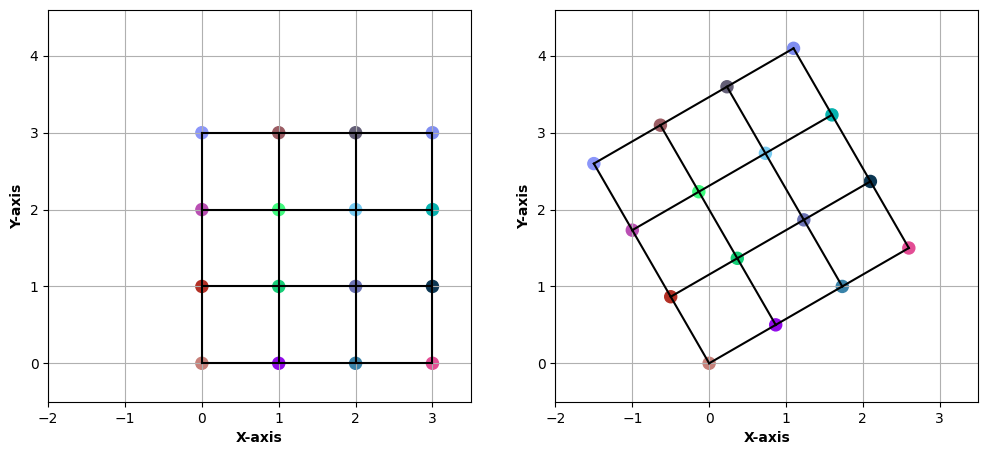

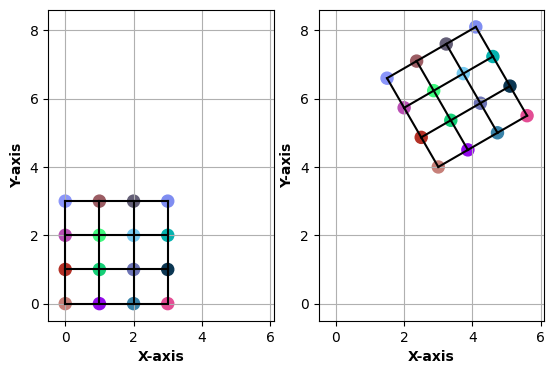

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gen_grid(n):
    X, Y = np.meshgrid(range(n), range(n))
    pos = np.column_stack((X.flatten(), Y.flatten()))
    dist_grid = np.linalg.norm(pos[:, np.newaxis, :] - pos[np.newaxis, :, :], axis=2)
    adj = dist_grid <= 1.1
    col_dot = np.random.rand(n * n, 3)
    return pos, adj, col_dot

def draw_grid(ax, pos, adj, col_dot, xylim):
    for i in range(len(adj)):
        for j in range(i+1, len(adj)):
            if adj[i, j]:
                ax.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 'k-', linewidth=1.5)
    ax.scatter(pos[:, 0], pos[:, 1], c=col_dot, edgecolors=col_dot, s=75, alpha=1)
    ax.axis('square')
    ax.set_xlim(xylim[0])
    ax.set_ylim(xylim[1])
    ax.grid(True)
    ax.set_xlabel('X-axis', fontweight='bold')
    ax.set_ylabel('Y-axis', fontweight='bold')

n = 4
pos, adj, col_dot = gen_grid(n)

# Translation (3, 4)
HE1 = np.eye(3)
HE1[0, 2] = 2
HE1[1, 2] = 3

pos_new = (HE1 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

# Rotation (30 degrees)
theta = np.deg2rad(30)
HE2 = np.array([[np.cos(theta), -np.sin(theta), 0],
                [np.sin(theta), np.cos(theta), 0],
                [0, 0, 1]])

pos_new = (HE2 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

# Rotation (30 degrees) + Translation (3, 4)
HE3 = HE2.copy()
HE3[0, 2] = 3
HE3[1, 2] = 4

pos_new = (HE3 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2)

draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

plt.show()


# Similrity Transformation

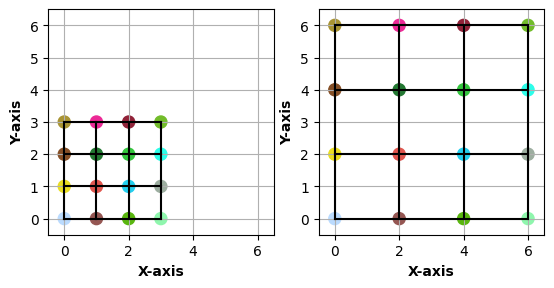

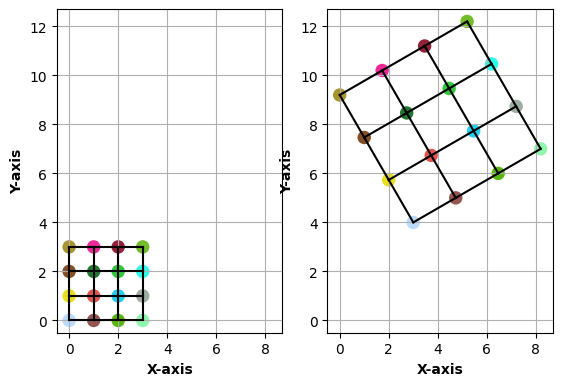

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def gen_grid(n):
    X, Y = np.meshgrid(range(n), range(n))
    pos = np.column_stack((X.flatten(), Y.flatten()))
    dist_grid = np.linalg.norm(pos[:, np.newaxis, :] - pos[np.newaxis, :, :], axis=2)
    adj = dist_grid <= 1.1
    col_dot = np.random.rand(n * n, 3)
    return pos, adj, col_dot

def draw_grid(ax, pos, adj, col_dot, xylim):
    for i in range(len(adj)):
        for j in range(i+1, len(adj)):
            if adj[i, j]:
                ax.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 'k-', linewidth=1.5)
    ax.scatter(pos[:, 0], pos[:, 1], c=col_dot, edgecolors=col_dot, s=75, alpha=1)
    ax.axis('square')
    ax.set_xlim(xylim[0])
    ax.set_ylim(xylim[1])
    ax.grid(True)
    ax.set_xlabel('X-axis', fontweight='bold')
    ax.set_ylabel('Y-axis', fontweight='bold')

n = 4
pos, adj, col_dot = gen_grid(n)

# Isometric scaling: X' = 2X 
HS1 = np.eye(3)
HS1[0, 0] = 2
HS1[1, 1] = 2

pos_new = (HS1 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2)

draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)


# X' = 2X + rotation 30 degrees + translation (3,4)
theta = 30
scale = 2

HS2 = np.eye(3)
HS2[0, 0] = scale * np.cos(np.radians(theta))
HS2[0, 1] = scale * -np.sin(np.radians(theta))
HS2[1, 0] = scale * np.sin(np.radians(theta))
HS2[1, 1] = scale * np.cos(np.radians(theta))
HS2[0, 2] = 3
HS2[1, 2] = 4

pos_new = (HS2 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2)

draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

# Anisotropic Scaling

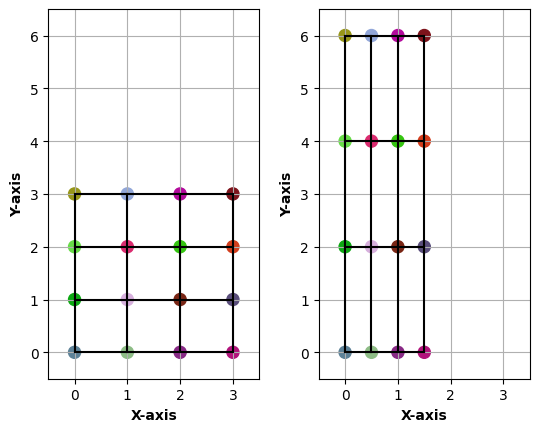

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gen_grid(n):
    X, Y = np.meshgrid(range(n), range(n))
    pos = np.column_stack((X.flatten(), Y.flatten()))
    dist_grid = np.linalg.norm(pos[:, np.newaxis, :] - pos[np.newaxis, :, :], axis=2)
    adj = dist_grid <= 1.1
    col_dot = np.random.rand(n * n, 3)
    return pos, adj, col_dot

def draw_grid(ax, pos, adj, col_dot, xylim):
    for i in range(len(adj)):
        for j in range(i+1, len(adj)):
            if adj[i, j]:
                ax.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 'k-', linewidth=1.5)
    ax.scatter(pos[:, 0], pos[:, 1], c=col_dot, edgecolors=col_dot, s=75, alpha=1)
    ax.axis('square')
    ax.set_xlim(xylim[0])
    ax.set_ylim(xylim[1])
    ax.grid(True)
    ax.set_xlabel('X-axis', fontweight='bold')
    ax.set_ylabel('Y-axis', fontweight='bold')

n = 4
pos, adj, col_dot = gen_grid(n)

# X2 = 0.5*X1 and Y2 = 2*Y1
HS1 = np.eye(3)
HS1[0, 0] = 0.5
HS1[1, 1] = 2


pos_new = (HS1 @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2)

draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

# Affine Transformation

det(A):


1.1553144

A after correction:


array([[ 2.    , -0.534 ],
       [ 0.1916,  0.5265]])

Theta angle (all three angles are the same): 16.023839336066484 16.023839336066434 16.023839336066434
Phi angles (all three angles are the same): 14.552804470379993 14.552804470379964 14.552804470379964
HA:


array([[ 2.    , -0.534 ,  0.    ],
       [ 0.1916,  0.5265,  0.    ],
       [ 0.    ,  0.    ,  1.    ]])

Resulting Matrix:


array([[ 2.    , -0.534 ,  0.    ],
       [ 0.1916,  0.5265,  0.    ],
       [ 0.    ,  0.    ,  1.    ]])

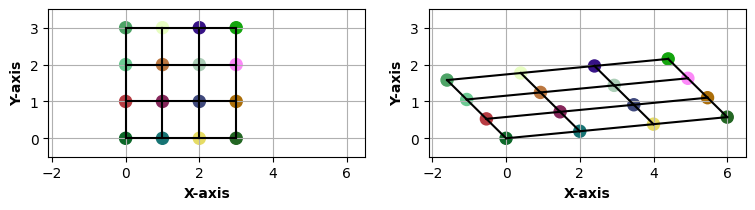

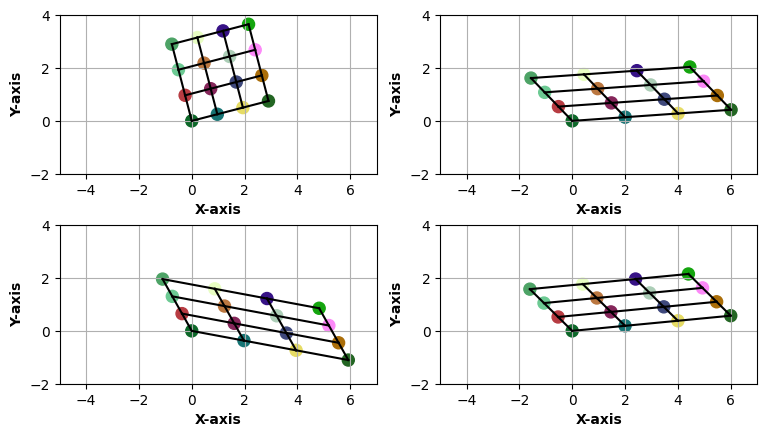

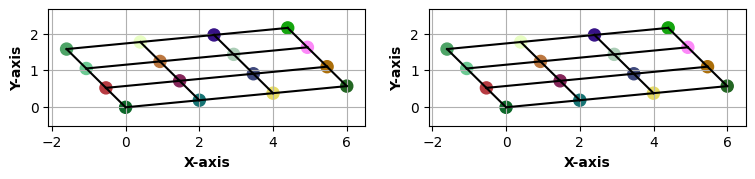

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def gen_grid(n):
    X, Y = np.meshgrid(range(n), range(n))
    pos = np.column_stack((X.flatten(), Y.flatten()))
    dist_grid = np.linalg.norm(pos[:, np.newaxis, :] - pos[np.newaxis, :, :], axis=2)
    adj = dist_grid <= 1.1
    col_dot = np.random.rand(n * n, 3)
    return pos, adj, col_dot

def draw_grid(ax, pos, adj, col_dot, xylim):
    for i in range(len(adj)):
        for j in range(i+1, len(adj)):
            if adj[i, j]:
                ax.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 'k-', linewidth=1.5)
    ax.scatter(pos[:, 0], pos[:, 1], c=col_dot, edgecolors=col_dot, s=75, alpha=1)
    ax.axis('square')
    ax.set_xlim(xylim[0])
    ax.set_ylim(xylim[1])
    ax.grid(True)
    ax.set_xlabel('X-axis', fontweight='bold')
    ax.set_ylabel('Y-axis', fontweight='bold')


n = 4
pos, adj, col_dot = gen_grid(n)

# Random generation A: 2 x 2
A = np.array([[2, -0.534], [0.1916, 0.5265]])
HA = np.eye(3)
HA[0:2, 0:2] = A

print("det(A):"); display(np.linalg.det(A))  # should be non-zero

U, D_arr, Vt = np.linalg.svd(A)
V = Vt.T

if np.linalg.det(U) < 0 and np.linalg.det(V) < 0:  # reflection correction
    U = U @ np.array([[-1, 0], [0, 1]])
    V = V @ np.array([[-1, 0], [0, 1]])

A = U @ np.diag(D_arr) @ V.T
print("A after correction:"); display(A)

R_theta = U @ V.T
theta = np.degrees(np.arccos(R_theta[0, 0]))

print("Theta angle (all three angles are the same):", np.degrees(np.arccos(R_theta[0, 0])),
      np.degrees(np.arcsin(-R_theta[0, 1])),
      np.degrees(np.arcsin(R_theta[1, 0])))

R_phi = V.T
phi = np.degrees(np.arccos(R_phi[0, 0]))
print("Phi angles (all three angles are the same):", np.degrees(np.arccos(R_phi[0, 0])),
      np.degrees(np.arcsin(-R_phi[0, 1])),
      np.degrees(np.arcsin(R_phi[1, 0])))

# A = Rt*Rp'*Dn*Rp (Please refer to the slide)
Rt = np.eye(3) 
Rt[0, 0] = np.cos(np.radians(theta))
Rt[1, 1] = np.cos(np.radians(theta))
Rt[0, 1] = -np.sin(np.radians(theta))
Rt[1, 0] = np.sin(np.radians(theta))

Rp = np.eye(3)
Rp[0, 0] = np.cos(np.radians(phi))
Rp[1, 1] = np.cos(np.radians(phi))
Rp[0, 1] = -np.sin(np.radians(phi))
Rp[1, 0] = np.sin(np.radians(phi))

Dn = np.eye(3)
Dn[0:2, 0:2] = np.diag(D_arr)

# Check if HA is the same as the reconstructed matrix from the decomposed matrices
print("HA:"); display(HA)
print("Resulting Matrix:"); display(Rt @ Rp.T @ Dn @ Rp)

# HA
pos_new = (HA @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos[:, 1].max())+0.5]])


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(9)
fig.set_figheight(3)

draw_grid(ax1, pos, adj, col_dot, xylim)
draw_grid(ax2, pos_new, adj, col_dot, xylim)

plt.figure(2, figsize=(9, 5))
transformations = [Rp, Dn @ Rp, Rp.T @ Dn @ Rp, Rt @ Rp.T @ Dn @ Rp]
for i, trans in enumerate(transformations, start=1):
    pos_new = (trans @ np.column_stack((pos, np.ones((n*n, 1)))).T)
    pos_new = (pos_new[:2] / pos_new[2]).T
    
    xylim = np.array([[-5,7],[-2, 4]])

    plt.subplot(2, 2, i)
    draw_grid(plt.gca(), pos_new, adj, col_dot, xylim)

pos_new_svd = pos_new

# HA
pos_new = (HA @ np.column_stack((pos, np.ones((n*n, 1)))).T)
pos_new = (pos_new[:2] / pos_new[2]).T

xylim = np.array([[min(pos_new[:, 0].min(), pos_new_svd[:, 0].min())-0.5, max(pos_new[:, 0].max(), pos_new_svd[:, 0].max())+0.5],
                 [min(pos_new[:, 1].min(), pos_new_svd[:, 1].min())-0.5, max(pos_new[:, 1].max(), pos_new_svd[:, 1].max())+0.5]])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(9)
fig.set_figheight(3)

draw_grid(ax1, pos_new, adj, col_dot, xylim)
draw_grid(ax2, pos_new_svd, adj, col_dot, xylim)

plt.show()


# Point Correspondance for Estimating a Homography

In [65]:
from sympy import symbols, Matrix, Eq, linear_eq_to_matrix

# Define symbols
h11, h12, h13, h21, h22, h23, h31, h32, h33 = symbols('h11 h12 h13 h21 h22 h23 h31 h32 h33')
x, y, x_p, y_p = symbols('x y x_p y_p')

# Define homography matrix and points
H = Matrix([[h11, h12, h13],
            [h21, h22, h23],
            [h31, h32, h33]])

x_vec = Matrix([x, y, 1])
xp_vec = Matrix([x_p, y_p, 1])

# Calculate the transformed point
Hx = H @ x_vec

# Define the equations
eqn1 = Eq(Hx[0] - xp_vec[0]/xp_vec[2]*Hx[2], 0)
eqn2 = Eq(Hx[1] - xp_vec[1]/xp_vec[2]*Hx[2], 0)

# Convert equations to matrix form
A1, b1 = linear_eq_to_matrix(eqn1, [h11, h12, h13, h21, h22, h23, h31, h32, h33])
A2, b2 = linear_eq_to_matrix(eqn2, [h11, h12, h13, h21, h22, h23, h31, h32, h33])

display(Matrix(A1))
display(Matrix(A2))

display(Matrix(b1))
display(Matrix(b2))

Matrix([[x, y, 1, 0, 0, 0, -x*x_p, -x_p*y, -x_p]])

Matrix([[0, 0, 0, x, y, 1, -x*y_p, -y*y_p, -y_p]])

Matrix([[0]])

Matrix([[0]])